# Gradient Descent Algorithm

### The next approximation point = the slope of the loss function * learning rate

To calculate the slope of a weight, need to multiply:
1. Slope of the loss function with respect to the value at the node we feed into
2. The value of the node that feeds into our weight
3. Slope of the activation function with respect to the value we feed into

Example:
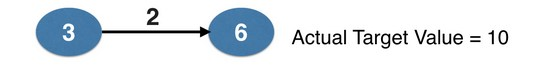
1. Loss function value = (10 - 6)^2 <br />
(predicted value - actual value)*2 = 2 * error = 2 * (-4)
2. The value of the node that feeds into our weight is 3
3. There is no activation function <br />
Therefore, the slope of a weight is 2*(-4)*3 = -24

Set learning rate = 0.01, then a better weight **w1 = 2 - (-24)*0.01 = 2 - (-0.24) = 2.24**

## Practicing Update the weight

In [1]:
import numpy as np

### Step by step

#### First iteration

In [2]:
# The original weight set
weights = np.array([1, 2])

# Input values
input_data = np.array([3, 4])

# Actual value of target
actual_target = 6

# Set up the learning rate
learning_rate = 0.01

In [3]:
# Make prediction
preds = (weights * input_data).sum()

In [4]:
# Calculate error 
error = preds - actual_target

In [6]:
# The slope of a weight (gradient)
gradient = error * 2 * input_data
gradient

array([30, 40])

In [8]:
# Update the weight
weights_update = weights - gradient * learning_rate
weights_update

array([0.7, 1.6])

#### The Second Iteration

In [9]:
# Make the second prediction
preds_2 = (weights_update * input_data).sum()

In [16]:
# Calculate error
error2 = preds_2 - actual_target
error2

2.5

In [11]:
# The slope of a weight (gradient)
gradient2 = error2 * 2 * input_data
gradient2

array([15., 20.])

In [12]:
# Update the weight
weights2_update = weights_update - gradient2 * learning_rate
weights2_update

array([0.55, 1.4 ])

### Use loop

In [26]:
# The original weight set
weights = np.array([1, 2])

# Input values
input_data = np.array([3, 4])

# Actual value of target
actual_target = 6

# Set up the learning rate
learning_rate = 0.01

[0.409375 1.2125  ]
[5, 2.5, 1.25, 0.625, 0.3125, 0.15625, 0.078125]


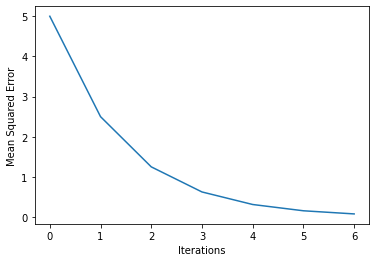

In [27]:
error_list = []
while True:
    pred = (weights*input_data).sum()
    error = pred - actual_target
    error_list.append(error)
    gradient = 2 * error * input_data
    if (gradient*gradient).sum() * learning_rate > 0.01:
        weights = weights - gradient * learning_rate
    else:
        break
    
print(weights)
print(error_list)

import matplotlib.pyplot as plt
plt.plot(error_list)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

# Backpropagation

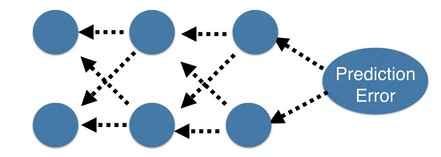

Allow gradient descent to update all weights in neural network (by getting gradients for all weights)

Process:
1. Start at some random set of weights
2. Use forward propagation to make a prediction
3. Use backward propagation to calculate the slope of the loss function with respect to each weight
4. Multiply that slope by the learning rate, and subtract from the current weights
5. Keep repeating step 2 to step 4 until we meet the stop criteria

## Example

先用Forward Propagation算出目前的prediction = 7

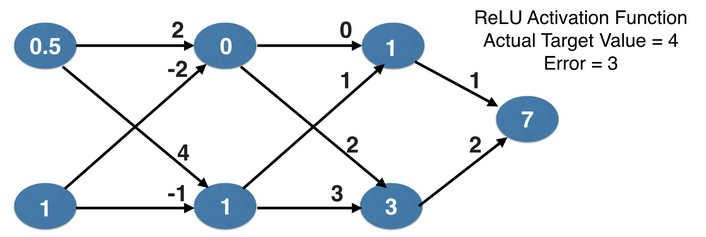

最後一層
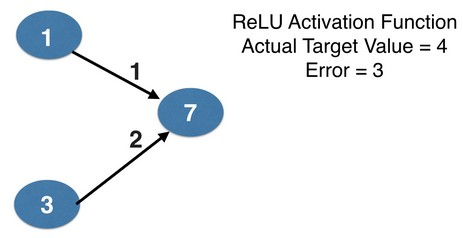
算出上面那個weight的gradient = 2 * error * input data * slope of activation function = 2 * (7-4) * 1 * 1 **(ReLU)** = 6 <br />
算出下面那個weight的gradient = 2 * error * input data * slope of activation function = 2 * (7-4) * 3 * 1 **(ReLU)** = 18 <br />
除了算出來的gradients來修正這一層的weights，這個gradients也會影響前一層的weights <br />
得到下圖，白色數字為前一層nodes內的值，紅色數字為目前這一層的gradients，黑色數字為原始weights

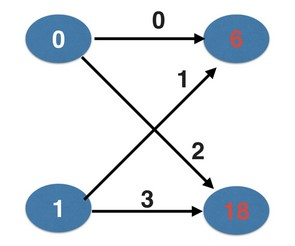

計算前一層weights的gradient，需要乘上：
1. Node value feeding into that weight
2. Slope of activation function for the node being fed into
3. Slope of loss function with respect to the output node **(下一層的gradient)**

左上node到右上node的weight的gradient = 0 * 1 * 6 = 0 <br />
左上node到右下node的weight的gradient = 0 * 1 * 18 = 0 <br />
左下node到右上node的weight的gradient = 1 * 1 * 6 = 6 <br />
左下node到右下node的weight的gradient = 1 * 1 * 18 = 18 <br />
得到這四個gradients後，就可以用來計算這一層新的weights，也可以計算再前一層的weights <br />

***

# Stochastic Gradient Descent

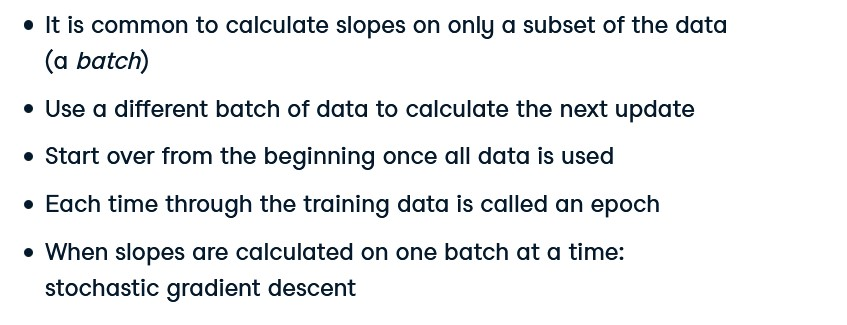